In [44]:
#read crypto_data.csv into Pandas
import pandas as pd
df = pd.read_csv('crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [45]:
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [46]:
len(df)

1252

In [47]:
#Discard all cryptocurrencies that are not being traded. 
df = df.loc[df['IsTrading'] == True]
len(df)

1144

In [48]:
#drop IsTrading column
df = df.drop(columns = 'IsTrading')
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [49]:
#Remove all rows that have at least one null value.
df = df.dropna()
len(df)

685

In [50]:
#Filter for cryptocurrencies that have been mined
df = df.loc[df['TotalCoinsMined'] > 0]
len(df)

532

In [51]:
#Delete the CoinName from the original dataframe.
df = df.drop(columns = 'CoinName')
df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [52]:
#drop column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
#rename column and set as index
# df.rename(columns={'Unnamed: 0': 'TradeSymbol'}, inplace=True)
# df.set_index('TradeSymbol', inplace=True)

# df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
TradeSymbol,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [53]:
#convert totalcoinsupply from object to float
df['TotalCoinSupply'] = pd.to_numeric(df['TotalCoinSupply'])
df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [54]:
#convert Algorithm and ProofType into numerical data. 
df_dummies = pd.get_dummies(df)
df_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(df_dummies)

In [56]:
# Perform dimensionality reduction with PCA, PCA(n_components=0.90) 
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
data_pca = pca.fit_transform(data_scaled)

#check shape of reduced data
len(pca.explained_variance_ratio_)

74

In [57]:
df_data_pca = pd.DataFrame(data=data_pca)
df_data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.072303e-16,-7.956437e-15,7.872893e-15,2.924671e-15,-3.892443e-16,8.633923e-16,3.052522e-15,4.896091e-15,-4.883682e-15,6.980473e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.557869e-16,-7.815760e-15,7.776851e-15,3.078532e-15,-2.803243e-16,7.583107e-16,3.023820e-15,5.025730e-15,-4.689595e-15,1.064663e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.585031e-13,7.673845e-14,-2.595322e-13,2.392680e-14,-6.133749e-14,5.696326e-15,-6.166034e-14,7.925024e-14,1.796626e-14,-2.821501e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835193e-15,-8.578812e-12,2.236011e-14,-0.002071,0.281463,0.251862,...,1.876415e-14,4.910524e-15,-4.078747e-14,3.040192e-15,9.186224e-15,3.091744e-15,-7.759718e-15,1.574858e-14,1.363431e-14,-1.999486e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.135403e-15,-1.191114e-11,4.760759e-14,0.027735,0.519099,0.188820,...,-1.681262e-14,-2.808937e-15,1.897747e-13,-8.792341e-14,2.102746e-13,1.220217e-13,-1.844720e-14,7.230983e-14,1.693282e-13,-2.162062e-13


In [58]:
df_data_pca.shape

(532, 74)

In [59]:
#run t-SNE on the principal components: the output of the PCA transformation. 
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(df_data_pca)
tsne_features.shape

(532, 2)

In [65]:
tsne_df = pd.DataFrame(data=tsne_features)
tsne_df.head()

,0,1
0,12.501563,-9.504675
1,15.537696,-15.948830
2,20.345797,-22.095089
3,-10.162781,29.795082
4,-19.149155,3.530581


<function matplotlib.pyplot.show(close=None, block=None)>

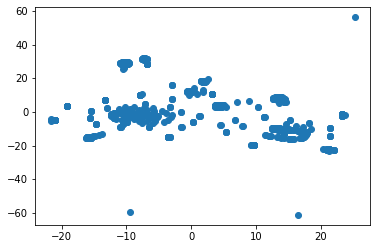

In [60]:
#Then create a scatter plot of the t-SNE output. 
import matplotlib.pyplot as plt
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show

C:\Users\ermcg\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


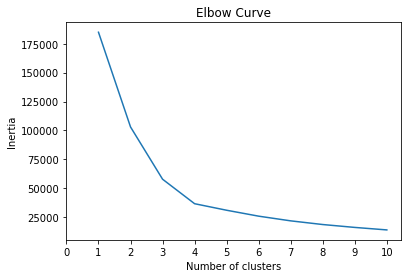

In [61]:
# Create an elbow plot to identify the best number of clusters. 
#Use a for-loop to determine the inertia for each k between 1 through 10. 
#Determine, if possible, where the elbow of the plot is, and at which value of k it appears.
from sklearn.cluster import KMeans

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [66]:
# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(tsne_features)

# Predict clusters
predictions = model.predict(tsne_features)

# Add the predicted class column to the dataframe
tsne_df["class"] = model.labels_
tsne_df.head()
    

,0,1,class
0,12.501563,-9.504675,1
1,15.537696,-15.948830,1
2,20.345797,-22.095089,1
3,-10.162781,29.795082,3
4,-19.149155,3.530581,0


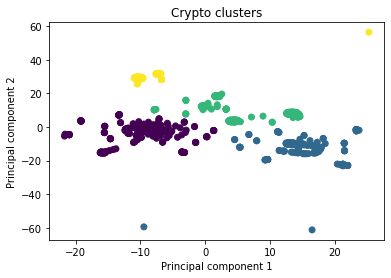

In [68]:
 # Visualize the clusters
plt.scatter(x=tsne_df[0], y=tsne_df[1], c=tsne_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto clusters')
plt.show()

Based on your findings, make a brief (1-2 sentences) recommendation to your clients: Can the cryptocurrencies be clustered together? If so, into how many clusters?

